In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import math
import numpy as np

In [2]:
df = pd.read_csv("data/updated_data.csv")

In [3]:
r_cols = ["R_Height_cms","R_Reach_cms"]
b_cols = ["B_Height_cms","B_Reach_cms"]
header = ["Height","Reach"]

In [4]:
R_heights_to_reach = df[r_cols]
R_heights_to_reach.columns = header
B_heights_to_reach = df[b_cols]
B_heights_to_reach.columns = header
MasterHR = R_heights_to_reach.append(B_heights_to_reach,ignore_index=True)

In [5]:
MasterHR.shape

(10288, 2)

In [6]:
MasterHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10288 entries, 0 to 10287
Data columns (total 2 columns):
Height    10288 non-null float64
Reach     9306 non-null float64
dtypes: float64(2)
memory usage: 160.8 KB


In [8]:
import seaborn as sb

Text(0, 0.5, 'Reach (Centimeters)')

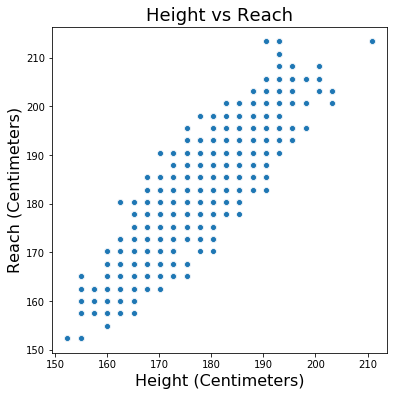

In [23]:
f, ax = plt.subplots(figsize=(6,6))

sb.scatterplot(MasterHR["Height"],MasterHR["Reach"])
ax.set_title("Height vs Reach",fontsize="18")
ax.set_xlabel("Height (Centimeters)",fontsize="16")
ax.set_ylabel("Reach (Centimeters)",fontsize="16")

In [220]:
trainer = MasterHR.dropna()
trainer.shape

(9306, 2)

In [221]:
X = np.array(list(trainer["Height"])).reshape(len(trainer),1)
y = np.array(list(trainer["Reach"])).reshape(len(trainer),1)

In [223]:
#Model gets trained with all Height to Reach data
nay = KNeighborsRegressor(n_neighbors=3).fit(X,y)


In [206]:
# MasterHR["KNN_Reach"] = MasterHR.apply(lambda x: nay.predict(np.array(x["Height"]).reshape(1,1))[0][0] if x["Reach"] == 0 else x["Reach"],axis=1)
# MasterHR["KNN_Reach"]

In [242]:
# #Testing Accuracy
# trainer["test"] = trainer["Height"].apply(lambda x: nay.predict(np.array(x).reshape(1,1))[0][0])
# trainer["diff"] = trainer["Reach"] - trainer["test"]
# trainer["diff"].describe()


In [243]:
# import matplotlib.pyplot as plt
# plt.hist(trainer["diff"])

In [253]:
df["R_Reach_cms_Updates"] = df.apply(lambda x: nay.predict(np.array(x["R_Height_cms"]).reshape(1,1))[0][0] if math.isnan(x["R_Reach_cms"]) else x["R_Reach_cms"],axis=1)

In [254]:
df["B_Reach_cms_Updates"] = df.apply(lambda x: nay.predict(np.array(x["B_Height_cms"]).reshape(1,1))[0][0] if math.isnan(x["B_Reach_cms"]) else x["B_Reach_cms"],axis=1)

In [256]:
df.drop(columns = ["B_Reach_cms","R_Reach_cms"])

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Weight_lbs,B_age,R_age,R_Reach_cms_Updates,B_Reach_cms_Updates
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,0.0,0.0,8.0,Orthodox,162.56,135.00,31.0,32.0,162.560000,170.180000
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,2.0,0.0,5.0,Southpaw,165.10,125.00,32.0,31.0,167.640000,167.640000
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,6.0,1.0,14.0,Orthodox,180.34,155.00,36.0,35.0,193.040000,185.420000
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,0.0,0.0,6.0,Orthodox,162.56,135.00,26.0,29.0,172.720000,170.180000
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,0.0,0.0,3.0,Southpaw,187.96,264.00,32.0,26.0,190.500000,185.420000
5,Tatiana Suarez,Nina Ansaroff,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0.0,...,2.0,0.0,4.0,NaN,165.10,115.00,33.0,28.0,167.640000,162.560000
6,Aljamain Sterling,Pedro Munhoz,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,False,Bantamweight,3,0.0,...,3.0,0.0,9.0,Orthodox,170.18,135.00,32.0,29.0,180.340000,165.100000
7,Karolina Kowalkiewicz,Alexa Grasso,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Women's Strawweight,3,1.0,...,0.0,0.0,5.0,Orthodox,160.02,115.00,25.0,33.0,162.560000,167.640000
8,Ricardo Lamas,Calvin Kattar,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Featherweight,3,0.0,...,3.0,0.0,10.0,Orthodox,172.72,145.00,31.0,37.0,180.340000,182.880000
9,Yan Xiaonan,Angela Hill,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0.0,...,0.0,0.0,3.0,Orthodox,165.10,115.00,34.0,29.0,160.020000,162.560000


In [257]:
df.to_csv("updated_again_data.csv",index=False)

In [259]:
df["B_Reach_cms_Updates"].describe()

count    5144.000000
mean      183.843692
std        10.000507
min       152.400000
25%       177.800000
50%       182.880000
75%       190.500000
max       213.360000
Name: B_Reach_cms_Updates, dtype: float64